# Part 1: Predict the price of a house


In [7]:
# Import Dependencies
import pandas as pd 
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression


# Data Gathering
df = pd.read_excel("/home/sarthak/Documents/Shack_labs_assignment/DS-assignment/DS - Assignment Part 1 data set.xlsx")
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


### Data Preprocessing

In [2]:
# Check null values
df.isnull().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

There is no NaN/null values in the dataset

In [3]:
# check datatypes of each variable
df.dtypes

Transaction date                            float64
House Age                                   float64
Distance from nearest Metro station (km)    float64
Number of convenience stores                  int64
latitude                                    float64
longitude                                   float64
Number of bedrooms                            int64
House size (sqft)                             int64
House price of unit area                    float64
dtype: object

#### EDA (Exploratory Data Analysis)

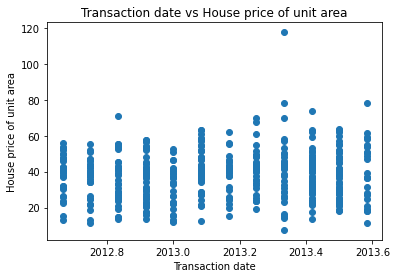

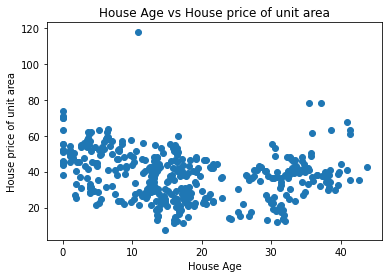

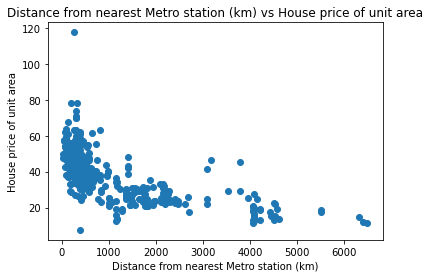

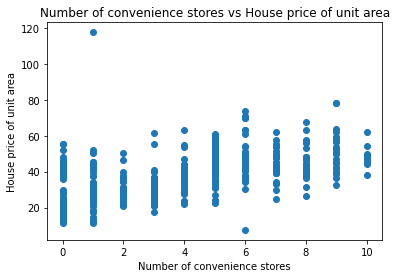

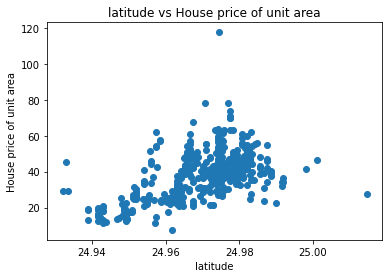

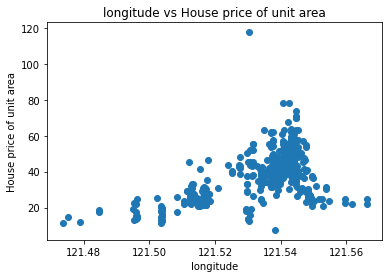

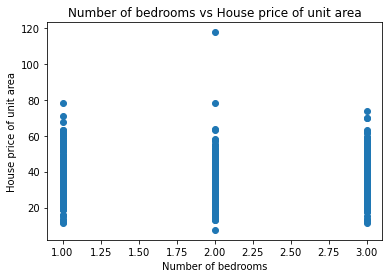

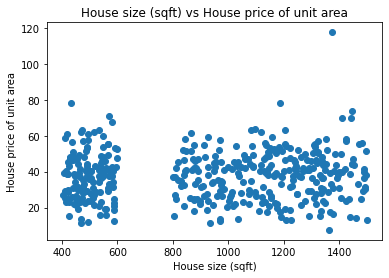

In [4]:
# Check relation between between independent features and dependent feature
import numpy as np
import matplotlib.pyplot as plt

def scatter_plot(df):
    """
    Create a scatter plot function for plot multple scatter plot against dependent feature

    Input :-
    df - Preprocessed DataFrame

    Output :- 
    plot - Scatter plot of each independent feature againt dependent feature "House Price"
    """
    columns = list(df.columns)
    X_columns = columns[0:-1]
    X_columns

    Y_column = columns[-1]
    Y_column

    for x_col in X_columns:
        plt.scatter(df[x_col], df[Y_column]);
        plt.xlabel(x_col)
        plt.ylabel(Y_column)
        plt.title("{} vs {}".format(x_col, Y_column))
        plt.show()

scatter_plot(df)

Based on Scatter plot, Most of the independent features are not create linear relationshio with dependent feature. Between "no. of bedrooms" and "House Price"and so we have to convert the data into some other relation.

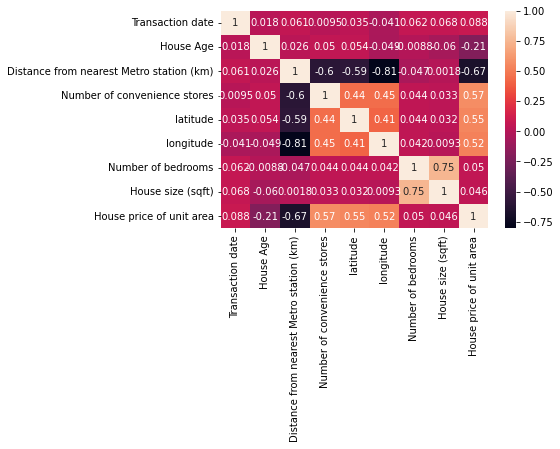

In [5]:
# Check correlation between each variable
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, annot=True);

According to heatmap, There are not any independent features who are highly correlated to each other.

In [6]:
# Split the data into independent and dependet variable
X = df.drop("House price of unit area", axis = 1)
Y = df["House price of unit area"]


### Create Model and Training

In [8]:

def trained_model(X, Y, Algorithm):
    """
    Create the function for create and train the all regression model for our data 

    Input :- 
    X - Independent features
    Y - Dependent feature (target feature)
    Algorithm - Regression Algorithm/model for model training

    Ouput :-
    mse - Mean Sqaure Error between actual value and predicted value
    mae - Mean Absolute Error Between actual value and predicted value
    r2 - R2 Score for check accuracy score of our model
    """
    
    # Scaling the dataset
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    # Trained the model
    regressor = Algorithm()
    model = regressor.fit(X_train, y_train)

    # Prediction
    y_pred = model.predict(X_test)
    
    mse = print(f"MSE :- {metrics.mean_squared_error(y_test, y_pred)}")
    mae = print(f"MAE :- {metrics.mean_absolute_error(y_test, y_pred)}")
    r2 = print(f"r2_score :- {metrics.r2_score(y_test, y_pred)}")
    return None


In [9]:
# Linear Regression
trained_model(X, Y, LinearRegression)

MSE :- 55.564142232548996
MAE :- 5.374236530635243
r2_score :- 0.6687873935940452


In Linear Regression, We got 55.56 MSE, 5.37 MAE and 66% R2 Score because most of the independent features are not create linear relationship with target feature and model gets confused so that's why we got this type of evaluation metrics.

In [10]:
# Lasso Regression
trained_model(X, Y, Lasso)

MSE :- 62.34569409860398
MAE :- 5.751542271716093
r2_score :- 0.6283632031218405


In Lasso Regression, We got 62.34 MSE, 5.75 MAE and 62% R2 Score. Lasso is used for reduced the overfitting in linear regression model but it still not give so much good results.

In [11]:
# Ridge Regression
trained_model(X, Y, Ridge)

MSE :- 58.28804505382821
MAE :- 5.576249106020439
r2_score :- 0.6525504660220053


In Ridge Regression, We got 58.28 MSE, 5.57 MAE and 65% R2 Score. Ridge is used for reduced the overfitting in linear regression model and it still better than linear regression and lasso for handing the overfitting.

In [12]:
# Decision Tree Regression
trained_model(X, Y, DecisionTreeRegressor)

MSE :- 64.11855421686747
MAE :- 5.5277108433734945
r2_score :- 0.6177953513208412


In Decision Tree Regression, We got 64.11 MSE, 5.52 MAE and 61% R2 Score but still it also not give better result as compare to other models. Decision Tree models is always best for Classification problems.

In [13]:
# Kneighbor Regression
trained_model(X, Y, KNeighborsRegressor)

MSE :- 50.226669879518056
MAE :- 4.98168674698795
r2_score :- 0.7006035624150859


In Kneighbors Regression, We got 50.22 MSE, 4.98 MAE and 70% R2 Score. It gives better till now, This algorithm is compute the results based on distance of new data and neighbors data so that's  why it gives better result.

In [14]:
# Gradient Boosting Regression 
trained_model(X, Y, GradientBoostingRegressor)

MSE :- 35.41345369675771
MAE :- 4.074296701288764
r2_score :- 0.7889037456629944


In Gradient Boosting Regression, We got 34.41 MSE, 4.07 MAE and 78% R2 Score. We check multiple regression algorithms but Gradient boosting regression gives best result because it has high computational power to solve the big problem and it used the multiple models in a sequential manner to get the best result.

In [15]:
# Support Vector Machine Regresson
trained_model(X, Y, SVR)

MSE :- 69.4010300601378
MAE :- 6.3897966019399846
r2_score :- 0.5863070115026275


In [17]:
# Ransac Regression
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Set RANSAC hyperparameters
ransac = RANSACRegressor(LinearRegression(),
						max_trials=4, 		# Number of Iterations
						min_samples=2, 		# Minimum size of the sample
						loss='absolute_error', 	# Metrics for loss
						residual_threshold=10, 	# Threshold
						)

# Train model
ransac.fit(X_train, y_train);

# Prediction
y_pred1 = ransac.predict(X_test)
    
mse = print(f"MSE :- {metrics.mean_squared_error(y_test, y_pred1)}")
mae = print(f"MAE :- {metrics.mean_absolute_error(y_test, y_pred1)}")
r2 = print(f"r2_score :- {metrics.r2_score(y_test, y_pred1)}")


MSE :- 72.05899851348886
MAE :- 6.363680772860297
r2_score :- 0.5704631124733808


With the help of RANSAC hyperparameters, we can not get good results.

In [18]:
# Applied Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures

polynomial_convertor=PolynomialFeatures(degree=2, include_bias=False)
poly_features=polynomial_convertor.fit_transform(X)
poly_features.shape
poly_reg = LinearRegression()
model = poly_reg.fit(X_train, y_train)


y_pred2 = model.predict(X_test)
    
mse = print(f"MSE :- {metrics.mean_squared_error(y_test, y_pred2)}")
mae = print(f"MAE :- {metrics.mean_absolute_error(y_test, y_pred2)}")
r2 = print(f"r2_score :- {metrics.r2_score(y_test, y_pred2)}")

MSE :- 55.564142232548996
MAE :- 5.374236530635243
r2_score :- 0.6687873935940452


In Polynomial Regression, We now convert tha data into polynomail form but still not get better result.

# Conclusion

 -   Based on Analysis, Gradient Boosting Algorithm gives best result till now.
 - Further Analysis, For getting much better result, we again check the data and also convert the Transaction date into datetime format and perform analysis.